# Introduction

1. I changed the keras code so that I could use it to update the actor model with a custom gradient
2. I am adding parameter noise, as suggested by OpenAI

When doing a hyperparameter search, I solved the problem at the parameter values below (see the figures in the stats/ folder). But, I'm having a hard time reproducing. This is to be expected, since there is randomness in tensorflow. According to link below, you should re-run the same net a bunch of times, and find the average; makes sense, although costly from a training perspective. Another option is to seed tensorflow. 

I'm going to do both, run an ensemble at the same parameter values, but with specified seeds. That way, at testing time, I can use the specified seed.

https://machinelearningmastery.com/reproducible-results-neural-networks-keras/

Notes: getting the action exploration right was the hard part. I believe (must check more rigorously) that adding the parameter noise was the key


WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
(episode, score, steps, T (mins)) = (10, -28.756283146865993, 999, 2.4411716500918073)
(episode, score, steps, T (mins)) = (20, -96.15313781483388, 999, 2.4345742662747702)
(episode, score, steps, T (mins)) = (30, -97.51564054769183, 999, 2.4287360509236655)
(episode, score, steps, T (mins)) = (40, -98.00780548702855, 999, 2.431936768690745)
(episode, score, steps, T (mins)) = (50, -98.69506146127266, 999, 2.4306726177533466)
(episode, score, steps, T (mins)) = (60, -98.88740528249878, 999, 2.1162068009376527)
(episode, score, steps, T (mins)) = (70, -98.2264111885234, 999, 2.1937446196873984)
(episode, score, steps, T (mins)) = (80, 80.72561378323432, 198, 0.4175120155016581)
(episode, score, steps, T (mins)) = (90, 82.29728918316866, 183, 0.3887322982152303)
(episode, score, steps, T (mins))

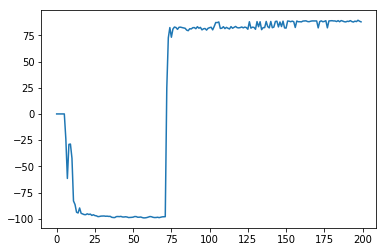

In [16]:
import gym
import time
import numpy as np
import matplotlib.pyplot as plt
from agent import Agent
%matplotlib inline

#Environment
seed = 1
env = gym.make('inverted_pendulum-v2')
env.seed(seed)  # for comparison
num_states = env.observation_space.shape[0]
num_actions = env.action_space.shape[0]

#Agent
gamma, lr, tau = 0.99, 0.0001, 0.001
agent = Agent(num_states, num_actions, lr, gamma, seed_num = seed)
agent.memory_size = 10**4
agent.batchsize = 256
learning_start = 25*agent.batchsize
agent.tau = tau


#Train
EPISODES = 200
MAX_STEPS = 1000
scores = []
for e in range(1,EPISODES+1):
    state = env.reset()
    reward_sum = 0
    done = False
    steps = 0
    t1 = time.time()
    
    while not done:
        #env.render()
        state = np.reshape(state, [1, num_states])  #reshape for keras
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward_sum += reward
        agent.remember(state[0], action, reward, next_state, done)
        state = next_state
        
        if len(agent.memory) > learning_start:
            agent.train_models()
        
        steps += 1
        if done or steps > MAX_STEPS:
            break
    
    #Learn & print results
    scores.append(reward_sum)
    t2 = time.time()
    if e % 10 == 0:
        print '(episode, score, steps, T (mins)) = ' + str((e,reward_sum, steps, (t2-t1)/60.0))

agent.save_target_weights()
plt.plot(scores)
#np.savetxt('stats/scores_inverted_pendulum.txt',scores)

### Watch a smart agent

In [26]:
env.reset()
done = False
while not done:
    env.render()
    state = np.reshape(state, [1, num_states])  #reshape for keras
    action = agent.act(state)
    next_state, reward, done, _ = env.step(action)
    reward_sum += reward
    state = next_state
    print 'position = ' + str( state[0] )
    if done:
        break
env.close()

position = -0.4973138009718405
position = -0.4977374232052735
position = -0.4983676924562132
position = -0.49919990857736174
position = -0.5002278655473861
position = -0.5014438969437723
position = -0.5028389322665544
position = -0.5044025636739886
position = -0.5061231227762504
position = -0.5079877669436339
position = -0.5099825745477918
position = -0.5120926484929877
position = -0.5143022272656591
position = -0.5165948027379279
position = -0.518953243796419
position = -0.5213599248780157
position = -0.523796858414752
position = -0.526245830145652
position = -0.5286885362034296
position = -0.5311067209163544
position = -0.5334823141835823
position = -0.5357975673450921
position = -0.5380351864760853
position = -0.5401784620414526
position = -0.5422113939023657
position = -0.5441188107434478
position = -0.5458864829983409
position = -0.5475012284726837
position = -0.5489510099043554
position = -0.5502250237911194
position = -0.5513137798727744
position = -0.5522091707583441
position =

position = -0.5255879331521246
position = -0.5231455817261328
position = -0.5207202171619544
position = -0.5183299663373455
position = -0.5159926922609055
position = -0.5137258597524691
position = -0.5115464042675786
position = -0.509470604909968
position = -0.5075139626050994
position = -0.5056910843582515
position = -0.504015574457753
position = -0.5024999334177912
position = -0.5011554653651934
position = -0.4999921945295252
position = -0.49901879137409466
position = -0.49824250887064464
position = -0.4976691292944671
position = -0.4973029219183222
position = -0.4971466118024822
position = -0.4972013601634333
position = -0.49746675570548454
position = -0.49794081762891373
position = -0.4986200101166646
position = -0.49949926820815677
position = -0.5005720348816787
position = -0.5018303091566605
position = -0.5032647048778681
position = -0.5048645198504091
position = -0.5066178148328293
position = -0.5085115019270393
position = -0.5105314417064502
position = -0.5126625484255986
posit

position = -0.5490992763365038
position = -0.5503346014293788
position = -0.5513838529736899
position = -0.5522392180426986
position = -0.5528943296249121
position = -0.5533443130985323
position = -0.5535858217589
position = -0.5536170611582901
position = -0.5534378021349957
position = -0.5530493824561097
position = -0.552454697057581
position = -0.5516581772078213
position = -0.5506657579171714
position = -0.549484834594121
position = -0.5481242089246097
position = -0.5465940243162885
position = -0.5449056913211384
position = -0.5430718034966681
position = -0.5411060443063554
position = -0.5390230856327862
position = -0.5368384786839037
position = -0.534568538035073
position = -0.5322302196924961
position = -0.5298409940744506
position = -0.5274187148926593
position = -0.5249814849897391
position = -0.5225475201521025
position = -0.5201350119980032
position = -0.5177619910478185
position = -0.5154461910625184
position = -0.5132049157356587
position = -0.5110549087704985
position = -0.

position = -0.5200270035062193
position = -0.522433034699463
position = -0.5248612979283999
position = -0.5272936437756993
position = -0.5297118931055103
position = -0.5320979738895141
position = -0.5344340571542572
position = -0.5367026909701446
position = -0.5388869314066042
position = -0.5409704694513962
position = -0.5429377529049088
position = -0.5447741023315316
position = -0.5464658202026402
position = -0.548000292446602
position = -0.5493660817021231
position = -0.5505530116197428
position = -0.551552241657635
position = -0.5523563318756561
position = -0.5529592973594939
position = -0.553356651883051
position = -0.5535454405845273
position = -0.5535242614582254
position = -0.5532932755307503
position = -0.5528542056639695
position = -0.5522103240560042
position = -0.5513664285128814
position = -0.5503288072457624
position = -0.5491051929107407
position = -0.5477047059954253
position = -0.5461377878756472
position = -0.5444161239850928
position = -0.5425525575946883
position = -

KeyboardInterrupt: 